<a href="https://colab.research.google.com/github/pyefiuna/Laboratorio/blob/master/notebooks/Semana%203/Distribucion_Binomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

!['Logo FIUNA'](http://www.ing.una.py/images/logo-horizontal.png)
# PROBABILIDAD Y ESTADÍSTICA
---


## Semana 3 - Distribuciones de probabilidad
### Distribución Binomial

### Materiales y recursos
##### Teoría:
* [Distribución Binomial](https://drive.google.com/file/d/1nsSupN3fb80MjWT8yokAAgJBLtAmdk40/view?ts=5f19b9dc)

##### Actividades de laboratorio
* [Vídeos de ejercicios de distribución binomial resueltos (en excel)](https://www.youtube.com/playlist?list=PLwx_FbswjRXy0PUH06vFIl3YJpy5daNqC)
* [Enunciados de ejercicios de distribución binomial](https://eaula.ing.una.py/pluginfile.php/76573/mod_resource/content/1/5.%20Distribuci%C3%B3n%20binomial%20Laboratorio%20-%20Enunciados.pdf)


### Importar módulos necesarios
* En esta sección, estaremos usando el módulo [scipy.stats](https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html), el cual nos provee la clases `binom` , para la resolución de problemas de distribución de probabilidades binomiales.
* Complementariamente usaremos el módulo matplotlib.pyplot para realizar todos los gráficos que necesitemos.

In [ ]:
from scipy.stats import binom   # De esta manera importamos solamente la clase deseada y no todo el módulo scipy.stats
import matplotlib.pyplot as plt # De esta manera importamos el módulo matplotlib.pyplot y le asignamos el alias de "plt" por conveniencia a la hora de trabajar con el mismo

# Ejercicios de distribución de probabilidad binomial
1. La probabilidad de que el comprador de un osciloscopio haga uso del servicedentro del plazo  de  garantía  es  0,2.  Para  los  5  osciloscopios  que  cierta  empresa  ha  vendido independientemente a 5 compradores este mes:
> (a). ¿Cuál es la probabilidad de que exactamente 3 de los compradores hagan uso de la garantía?
(b). ¿Cuál es la probabilidad de que 3 o más compradores hagan uso de la garantía?

In [ ]:
# Declaramos las variables que necesitaremos para el ejercicio:
cant_ensayos = 5
prob_exito = 0.2

# Creamos un objeto del tipo "binom" distribución binomial, con los parametros anteriores:
dist_binomial = binom(cant_ensayos, prob_exito)

# A partir de este momento, solo necesitamos llamar al objeto dist_binomial cada
# vez que necesitemos hacer un cálculo referente a la distribución con binomial 
# con los parámetros dados en el ejercicio.

(a). Para hallar la probabilidad de que **exactamente** 3 de los compradores hagan uso de la garantía, debemos aplicar el método `pmf()` _probability mass function_ al cual debemos pasar como parémetro x el número de ocurrencias del cual necesitamos calcular la probabilidad, para la función binomial dada.

In [ ]:
# Para ello aplicamos la función pmf() a nuestra distribución binomial, a la cual habíamos llamado dist_binomial, de la siguiente manera:
prob_de_3 = dist_binomial.pmf(3) # Guardamos el valor calculado dentro de la variable "prob_de_3"

# A continuación imprimimos lo calculado haciendo uso de la funcion print()
# También redondeamos el resultado a 5 digitos decimales
print('La probabilidad de que exactamente 3 compradores hagan uso de su garantía es:', round(prob_de_3, 5))


La probabilidad de que exactamente 3 compradores hagan uso de su garantía es: 0.0512


Antes de resolver el ítem (b), recordemos que: 
> $p(0) + p(1) + p(2) + p(3) + p(4) + p(5) = 1$

es decir, que si queremos hallar la probabilidad de que al menos dos clientes hagan uso de la garantía podemos hallar:
> $ p(x>2) = 1 - [p(0) + p(1) + p(2)]$

(b). Para hallar la probabilidad de que 3 o más compradores hagan uso de la garantía tenemos dos opciones:
* Aplicar la fórmula indicada más arriba. Usando el método `cdf(x)` _cumulative distribution function_ podemos calcular la probabilidad acumulada, para x = 2, de que 0, 1 y 2 compradores hagan uso de la garantía, o
* Hacer uso del método `sf()` _survival function_ la cual calcula el valor $1-cdf(x)$ dónde cdf es la probabilidad acumulada de x.

In [ ]:
# Hallemos la respuesta usando la primera opción, la probabilidad acumulada para x=2 está dada por:
prob_acum_2 = dist_binomial.cdf(2) # Recordemos que: prob_acum_2 = p(0) + p(1) + p(2)

prob_almenos_3 = 1 - prob_acum_2
# Imprimimos la respuesta redondeada a 5 dígitos decimales
print('La probabilidad de que al menos 3 personas hagan uso de la garantía es:', round(prob_almenos_3, 5))

La probabilidad de que al menos 3 personas hagan uso de la garantía es: 0.05792


In [ ]:
# Hallemos ahora la respuesta usando la segunda opción, para evitar confución vamos a usar otra variable: "p_al_menos_3":
p_al_menos_3 = dist_binomial.sf(2)

# Imprimimos la respuesta redondeada a 5 dígitos decimales:
print('La probabilidad de que al menos 3 personas hagan uso de la garantía es:', round(p_al_menos_3, 5))

# Podemos comparar ambos resultados y comprobar que ambos métodos son factibles

La probabilidad de que al menos 3 personas hagan uso de la garantía es: 0.05792


### Opcional
De manera a conocer el potencial que nos ofrece el módulo `scipy.stats` haremos uso de algunas de sus funciones para hallar otros parámetros de la función binomial dada (n=5, p= 0,2)

In [ ]:
# Si quisieramos calcular la media, varianza, sesgo y kurtosis para los parámetros dados, solo tendríamos que hacer uso de:
media, var, sesgo, kurt = dist_binomial.stats(moments='mvsk')

print('Media:', media)
print('Varianza:', var)
print('Sesgo:', sesgo)
print('Kurtosis:', kurt)

Media: 1.0
Varianza: 0.8
Sesgo: 0.670820393249937
Kurtosis: 0.04999999999999977


También podríamos valernos de una lista de valores para x, en este caso de 0 a 5 clientes que hacen uso de la garantía y obtener una lista de probabilidades para cada valor correspondiente de x. Esto es particularmente útil para graficar la distribución de probabilidades del problema.

In [ ]:
# Creamos una variable x con un rango de valores de 0 a 5
x = range(6) # La función range nos devuelve un objeto iterable que inicia en 0 (por defecto) y termina en el valor dado sin incluirlo es decir 0, 1, 2, 3, 4, 5.

# Calculemos las probabilidades para cada valor de x, las cuales guardaremos en la variable p
p = dist_binomial.pmf(x)

# Si imprimimos p, vemos que es una lista (vector) con el valor de probabilidad para cada valor de x dado
print(p) # Recordemos que x va de 0 a 5, por lo tanto p(3) es el cuarto valor de la lista p

[3.2768e-01 4.0960e-01 2.0480e-01 5.1200e-02 6.4000e-03 3.2000e-04]


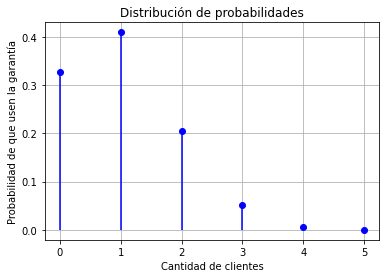

In [ ]:
# Finalmente podemos graficar la función haciendo uso del módulo matplotlib.plotlib, al que llamamos con el alias de plt
fig, ax = plt.subplots(1, 1) # Creamos un lienzo para nuestro gráfico

# El gráfico está dado por:
ax.plot(x, p, 'bo') # Agregamos nuestro gráfico en forma de puntos azules con el comando 'bo' -> b: blue (azul)- o: puntos
ax.vlines(x= x, ymin= 0, ymax= p, colors='b') # Agregamos las líneas verticales desde ymin= 0 hasta ymax = p(x), de color azul

# Los demás complementos, opcionales:
ax.grid() # Agrega las grillas al gráfico
ax.set_title('Distribución de probabilidades')
ax.set_xlabel('Cantidad de clientes')
ax.set_ylabel('Probabilidad de que usen la garantía')
plt.show()

2. Un examen de estadística de elección múltiple contenía 20 preguntas y cada una de ellas 5 respuestas. Solo hay una respuesta correcta por pregunta. Si un estudiante desconocía todas las respuestas y contestó al azar.
> (a).¿Cuál es la probabilidad de que conteste correctamente a 5 preguntas? (b).¿Cuál es la probabilidad de que conteste correctamente a lo más 5 preguntas?

In [ ]:
# Declaramos las variables que necesitaremos para el ejercicio:
resp_correctas = 1
resp_posibles = 5
cant_ensayos = 20
prob_exito = resp_correctas / resp_posibles

# Creamos un objeto del tipo "binom" distribución binomial, con los parametros anteriores:
dist_binomial = binom(cant_ensayos, prob_exito)

# A partir de este momento, solo necesitamos llamar al objeto dist_binomial cada
# vez que necesitemos hacer un cálculo referente a la distribución con binomial 
# con los parámetros dados en el ejercicio.

(a).¿Cuál es la probabilidad de que conteste correctamente a 5 preguntas? Para responder a esta pregunta usamos el método `pmf()` de la clase `binom`. Para ello, recordemos que en el paso anterior ya creamos un objeto del tipo `binom` al que llamamos `dist_binomial` el cual ya contiene los datos del problema.

In [ ]:
# Para ello aplicamoc la función pmf() a nuestra distribución binomial:
prob_de_exact_5 = dist_binomial.pmf(5) # Guardamos el valor calculado dentro de la variable "prob_de_exact_5"

# A continuación imprimimos lo calculado haciendo uso de la funcion print()
# También redondeamos el resultado a 5 digitos decimales
print('La probabilidad de que responda correctamente a exactamente 5 preguntas es:', round(prob_de_exact_5, 5))

La probabilidad de que responda correctamente a exactamente 5 preguntas es: 0.17456


(b).¿Cuál es la probabilidad de que conteste correctamente a lo más 5 preguntas?. O dicho de otra manera cuál es la probabilidad de que conteste 0, 1, 2, 3, 4 o 5 respuestas correctamente. Para ello, hacemos uso del método `cdf(x)` lo aplicamos a nuestro objeto `dist_binom` con $x = 5$ y tendremos la respuesta buscada.

In [ ]:
prob_hasta_5 = dist_binomial.cdf(5)

# A continuación imprimimos lo calculado haciendo uso de la funcion print()
# También redondeamos el resultado a 5 digitos decimales
print('La probabilidad de que responda correctamente a lo más 5 preguntas es:', round(prob_hasta_5, 5))

La probabilidad de que responda correctamente a lo más 5 preguntas es: 0.80421


### Opcional
Graficar la distribución de probabilidades para responder correctamente 0, 1, 2... 20 preguntas del examen.

In [ ]:
# Primero creamos el eje x
x = range(21) # recordemos que esto crea un objeto iterable "range" con valores desde 0 (por defecto) hasta 20 (21 valores en total)

# Luego calculamos los valores de probabilidad para cada x:
p = dist_binomial.pmf(x)

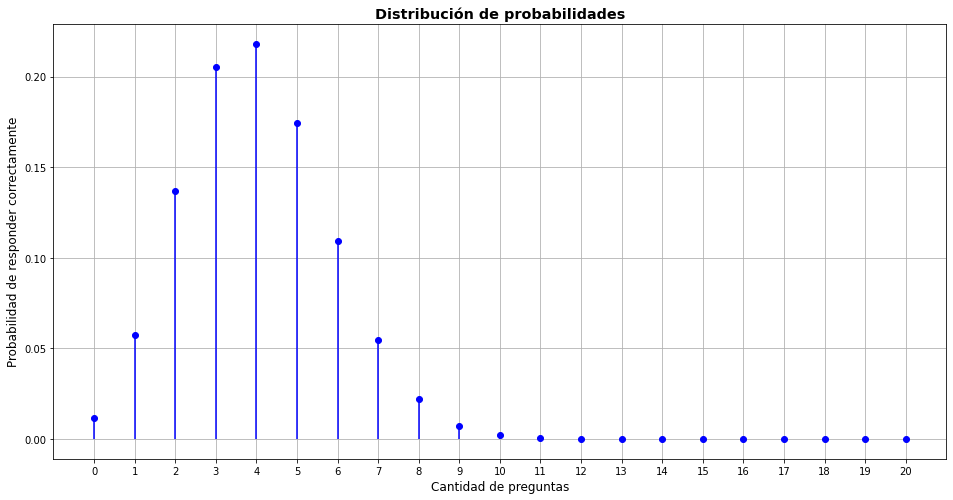

In [ ]:
fig, ax = plt.subplots(1, 1, figsize= (16,8)) # Creamos un lienzo para nuestro gráfico

# El gráfico está dado por:
ax.plot(x, p, 'bo') # Agregamos nuestro gráfico en forma de puntos azules con el comando 'bo' -> b: blue (azul)- o: puntos
ax.vlines(x= x, ymin= 0, ymax= p, colors='b') # Agregamos las líneas verticales desde ymin= 0 hasta ymax = p(x), de color azul

# Los demás complementos, opcionales:
ax.grid() # Agrega las grillas al gráfico
ax.set_title('Distribución de probabilidades', fontsize='x-large', fontweight= 'bold') # Agrega un título, con tamaño de fuente extra grande y en negritas
ax.set_xlabel('Cantidad de preguntas', fontsize='large') # Agrega texto al eje x
ax.set_ylabel('Probabilidad de responder correctamente', fontsize='large') # Agrega texto al eje y
plt.xticks(x) # Modifica los puntos representados en el eje x, y la grilla para que coincidan exactamente a intervalos enteros
plt.show() # Para mostrar el gráfico

3. Un  experimento  consiste  en  lanzar  un  dado  varias  veces.  Determine  la  probabilidad  de que aparezca:
> (a). La cara 6 entre 29 y 32 veces inclusive, si el dado es lanzado 170 veces
(b). La cara 6 menos de 22 veces, si el dado es lanzado 170 veces
(c). Algún número par, si el dado es lanzado 5 veces

In [ ]:
# Empezamos por definir los parámetros para las primeras dos preguntas.
# Declaramos las variables que necesitaremos para el ejercicio:
casos_favorables = 1  # Que salga la cara 6
casos_posibles = 6    # Por las 6 caras del dado
cant_ensayos = 170
prob_exito = casos_favorables / casos_posibles

# Creamos un objeto del tipo "binom" distribución binomial, con los parametros anteriores:
dist_binomial = binom(cant_ensayos, prob_exito)

# A partir de este momento, solo necesitamos llamar al objeto dist_binomial cada
# vez que necesitemos hacer un cálculo referente a la distribución con binomial 
# con los parámetros dados en el ejercicio.

(a). La cara 6 entre 29 y 32 veces inclusive, si el dado es lanzado 170 veces. Para resolver esto podemos hallar la probabilidad acumulada de 32 y a esta restar la probabilidad acumulada de 28, haciendo uso del método `cdf(x)`

In [ ]:
# Hallamos la probabilidad acumulada de 32:
prob_acum_32 = dist_binomial.cdf(32)
# Hallamos la probabilidad acumulada de 28:
prob_acum_28 = dist_binomial.cdf(28)

# Hallamos la diferencia de ambas
prob_entre_29_y_32 = prob_acum_32 - prob_acum_28

# Imprimimos el resultado redondeado a 5 dígitos decimales
print('La probabilidad de que la cara 6 salga entre 29 y 32 veces es de:', round(prob_entre_29_y_32, 5))

La probabilidad de que la cara 6 salga entre 29 y 32 veces es de: 0.28336


(b). La cara 6 menos de 22 veces, si el dado es lanzado 170 veces. Es decir la probabilidad acumulada de 21. 

In [ ]:
prob_acum_21 = dist_binomial.cdf(21)

# Imprimimos el resultado redondeado a 5 dígitos decimales
print('La probabilidad de que la cara 6 salga menos de 22 veces es:', round(prob_acum_21, 5))

La probabilidad de que la cara 6 salga menos de 22 veces es: 0.07597


 (c). Algún número par, si el dado es lanzado 5 veces. Para responder a esta pregunta debemos volver a crear el objeto dist_binomial, o crear uno distinto,para los datos dados. Hecho esto, debemos considerar que la respuesta estará satisfecha si obtenemos 1, 2, 3, 4 o 5 numeros pares.


In [ ]:
# Declaramos las variables con los nuevos datos:
casos_favorables = 3  # Cantidad de números pares del dado: 2, 4 y 6
casos_posibles = 6    # El total de caras del dado
prob_exito = casos_favorables / casos_posibles
cant_ensayos = 5

# Para este ejemplo, simplmente vamos a reutilizar nuestra variable
dist_binomial = binom(cant_ensayos, prob_exito)

In [ ]:
# Una forma de hacer esto es calcular la probabilidad para x= 1, 2, 3, 4, 5 y sumar todos los resultados:
# Calcular las probabilidades para x=[1,2,3,4,5] puede hacerse en un solo paso, como vimos al hacer los gráficos
p = dist_binomial.pmf(range(1,6)) # Esto nos devuelve un vector con todas las probabilidades, para x=[1,2,3,4,5]

prob_algun_par = sum(p) # Esto nos permite hallar la suma de todos los valores obtenidos en el array p.

# Imprimimos el resultado
print('La probabilidad de que salga algú número par, si el dado es lanzado 5 veces, es:', round(prob_algun_par, 5))

La probabilidad de que salga algú número par, si el dado es lanzado 5 veces, es: 0.96875


4. Una fábrica produce en cada turno 100 piezas de forma que la probabilidad de que una sea defectuosa es 0.05. En elcontrol de calidad se revisan todas las piezas y se depositan las defectuosas en un recipiente que se vacía al final de cada turno. 
> ¿Cuántas piezas ha de contener el recipiente para que la probabilidad de que su capacidad no se vea rebasada al final de cada turno sea mayor o igual a 0,95?

En otras palabras, tenemos que hallar la cantidad de botellas defectuosas (x) para la cual la probabilidad acumulada, sea mayor o igual a 0,95.
Para esto hacemos usa del método `ppf()` _percent point function_ el cual es la inversa del método `cdf()`

In [ ]:
# Definimos las variables conocidas:
cant_ensayos = 100
prob_exito = 0.05

# Creamos un objeto del tipo "binom" distribución binomial, con los parametros anteriores:
dist_binomial = binom(cant_ensayos, prob_exito)

# Hallamos x, para que satisfaga p(x) >= 0.95
x = dist_binomial.ppf(0.95)

# Imprimimos el resultado
print('El recipiente debe contener al menos:', int(x), 'botellas para que la probabilidad de que su capacidad no se vea rebasada al final de cada turno sea mayor o igual a 0,95')

El recipiente debe contener al menos: 9 botellas para que la probabilidad de que su capacidad no se vea rebasada al final de cada turno sea mayor o igual a 0,95


5. Se estima que la probabilidad de que una muestra de agua del lago Ypacarai de 1 $cm^{3}$ contenga alguna bacteria es de 0,86. 
> (a). Si se toman en forma independiente 8 muestras de agua de 1 $cm^{3}$ cada una, ¿cuál es la  probabilidad  de  que  por  lo  menos  una  muestra  contenga  alguna  colonia  de bacterias? (b). ¿Cuál es el número mínimo de muestras de 1 $cm^{3}$ que deberían tomarse para tener al menos 99% de probabilidad de observar al menos una colonia?

In [ ]:
# Definimos las variables del problema:
cant_ensayos = 8
prob_exito = 0.86

# Creamos un objeto del tipo "binom" distribución binomial, con los parametros anteriores:
dist_binomial = binom(cant_ensayos, prob_exito)

> (a). Si se toman en forma independiente 8 muestras de agua de 1 $cm^{3}$ cada una, ¿cuál es la probabilidad de que por lo menos una muestra contenga alguna colonia de bacterias?

Para esto usamos la función `sf(x)` con $x = 0$ 

In [ ]:
prob_al_menos_1 = dist_binomial.sf(0)

# Imprimimos el resultado redondeado a 5 digitos decimales
print('La probabilidad de que al menos una de las muestras contenga alguna colonia de bacterias es:', prob_al_menos_1)

La probabilidad de que al menos una de las muestras contenga alguna colonia de bacterias es: 0.9999998524210943


> (b). ¿Cuál es el número mínimo de muestras de 1 $cm^{3}$ que deberían tomarse para tener al menos 99% de probabilidad de observar al menos una colonia?

En este caso, lo que tendremos que ir variando es el la cantidad de ensayos, y con esto encontrar el número mínimo de ensayos a realizar para que almenos una muestra contenga alguna colonia de bacterias con una probabilidad de 99%. Como en la parte (a) vemos que para 8 ensayos la probabilidad de obtener al menos una colonia de bacterias era más de 99,99%, tomaremos 8 como nuestro límite superior para la cantidad de ensayos a realizar. 

In [ ]:
# Definimos la cantidad de ensayos como el intervalo de 1 a 8
cant_ensayos = range(1, 9) # Rango desde 1 (inclusive) hasta 9 (excluyendo al 9)

# Esta vez no definimos un único objeto "binom" ya que la forma de la distribución binomial cambia con la cantidad de ensayos
# Por lo tanto para calcular la probabilidad para cada caso solicitado escribimos la siguiente expresión:
p = binom.sf(0, cant_ensayos, prob_exito)
print(p)

[0.86       0.9804     0.997256   0.99961584 0.99994622 0.99999247
 0.99999895 0.99999985]


Al imprimir p obtenemos las probabilidades de encontrar al menos una colonia de bacterias para los distintos valores de muestra.
> $p = [0.86, 0.9804, 0.997256, 0.99961584, 0.99994622, 0.99999247, 0.99999895, 0.99999985]$

Vemos que el 3er elemento satisface la condición de que su probabilidad sea de 99% por lo tanto la respuesta buscada es:
$n = 3$